# tutorial

> How to use the tool?

In [1]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from slicer.core import *
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import PIL,os,mimetypes, glob, skimage
from PIL import Image
from natsort import natsorted

## Define Parameters

> Important: Please define all parameters below

## Prepocess

Define the scaling for the slices in a list

> Important: The function ImageSlicer.show_slices() will help to visualize the scaling

> Important: For the parameters of the functions see [Core](https://abalone1.github.io/slicer/core)

> Note: The scaling of different datasets can be adjusted -> Improves the stability of the training significantly

In [3]:
slice_range = [300, 600]

### Optional: 

Define quantiles from a slice range

In [4]:
slice_l = ImageSlicer.quantile_from_slice_range(slice_range);slice_l

[300, 375, 450, 525, 600]

Input directory (where the images are)

In [5]:
inp_d = Path("./docs/img")

In [6]:
slice_l

[300, 375, 450, 525, 600]

Visualization of the scaling defined in a list

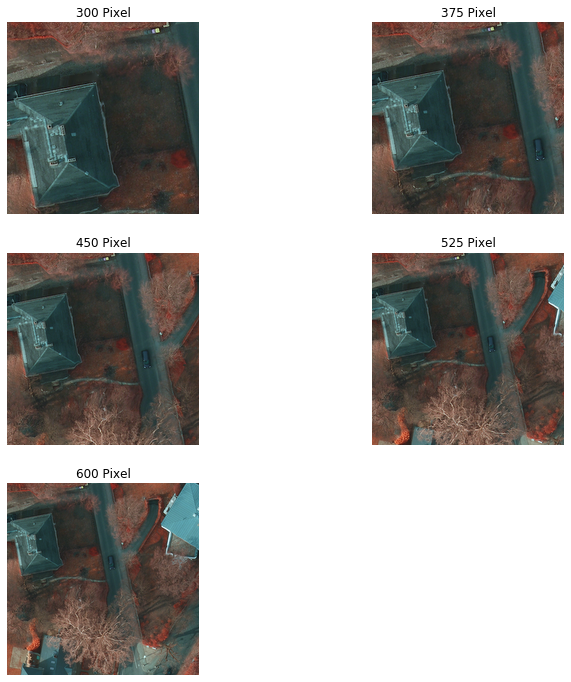

In [7]:
ImageSlicer.show_slices(slice_l, inp_d)

### Optional add padding

- Add padding so that slices at the border are not cut out (depenend on the scaling of the slices)

In [ ]:
pad = 300

In [ ]:
inp_d = Path("./docs/img")

In [ ]:
ImageSlicer.add_padding(inp_d, pad)

In [ ]:
#hide
img_p = Image.open('./docs/img/out_padded/top_potsdam_2_14_IRRG.png')
img_pad = img_p.resize((300,300), Image.ANTIALIAS)

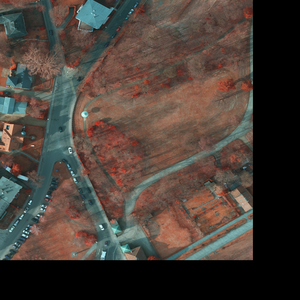

In [ ]:
img_pad

## Slice Images

In [14]:
inp_d_2 = Path("./docs/img/out_padded/") 

Which parts of the image should be unique? The image below can help to find a good parameter.

In [8]:
overlap = 2 

In [9]:
#hide
ov = Image.open('./docs/images/overlap2.png')
ovl = ov.resize((400 , 320), Image.ANTIALIAS)

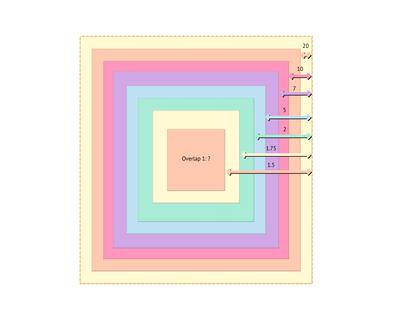

In [10]:
ovl

Output size of the sliced tiles 

> Note: Depends on the deep learning architecture 

> Note: In fastai different resized slices can be used for the training

In [11]:
resize = 224 

Definition of the directory name with the used parameters

In [12]:
dir_name = f'test_{resize}_{overlap}_{slice_range[0]}-{slice_range[1]}';dir_name 

'test_224_2_300-600'

Process and status report

In [15]:
ImageSlicer.slice_images(inp_d_2, dir_name , slice_l, resize, overlap)

Overlap = 2
Resize to = 224*224
----
Process slice: 300
Rows: 16
Columns: 13
----
Finished
----
Process slice: 375
Rows: 13
Columns: 11
----
Finished
----
Process slice: 450
Rows: 11
Columns: 9
----
Finished
----
Process slice: 525
Rows: 9
Columns: 8
----
Finished
----
Process slice: 600
Rows: 8
Columns: 7
----
Finished
----
Saved under: docs\img\out_padded\test_224_2_300-600
Count:  336


> Note: Multi stage interpolation (Nearest Neighbor + Bicubic combined) will be used

> Note: Optional Parameter out_path, cb , half_empty. All other parameter need to be set.

> Note: More than half empty slices (half_empty = True) will be ignored. When you dont want this change to half_empty = False .

Example of a saved slice:

In [ ]:
#hide
sl = Image.open('./docs/img/out_padded/test_224_7_300-600/top_potsdam_2_14_IRRG_2_7_300.png')

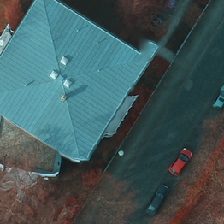

In [ ]:
sl

## Slice masks

Definition of the parameters similiar to process of images (ImageSlicer.slice_images). 

> Important: Added parameter palette (type: dictionary)

> Note: For transforming a rgb mask to greyscale and to transforme after the interference back to rgb

In [ ]:
palette = {0 : (255, 255, 255), # Impervious surfaces (white)
           1 : (0, 0, 255),     # Buildings (blue)
           2 : (0, 255, 255),   # Low vegetation (cyan)
           3 : (0, 255, 0),     # Trees (green)
           4 : (255, 255, 0),   # Cars (yellow)
           5 : (255, 0, 0),     # Clutter (red)
           6 : (0, 0, 0)}       # Undefined (black)

In [ ]:
ImageSlicer.slice_masks(inp_d_2,dir_name , slice_l, resize, overlap, palette)

> Note: Interpolation nearest neighbor  will be used

## Fastai interference and image mosaicing

> Note: Not up to date

In [ ]:
from fastai import vision
from PIL import Image
from functools import partial

Define individuell metrics from exported fastai model

In [ ]:
def acc_isprs(input, target):
    target = target.squeeze(1)
    mask = target != void_code 
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()
metrics = acc_isprs
f_score1 = partial(fbeta , beta=1)

Path to exported fastai model

In [ ]:
path_model  = Path('D:/david/va_po/im_train/va_5-9_po__9-13_448')

Type in the amount of rows and columns to rearrange the image

In [ ]:
rows, columns = 7,7

In [ ]:
ImageSlicer.predict_from_fastai_model(path_fastai_model= path_model,inp_d= inp_d, dir_name=dir_name, 
palette= palette , rows= rows, columns= columns )

In [ ]:
#hide
pr = Image.open('./docs/images/2_14.png')
pred = pr.resize((300 , 300), Image.ANTIALIAS)

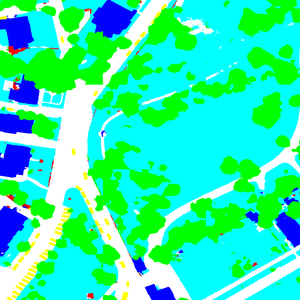

In [ ]:
pred